In [1]:
import numpy as np
import pandas as pd
from astropy import constants as const 
import astropy.units as u
from astropy.modeling.models import BlackBody
import matplotlib.pyplot as plt
import matplotlib as mpl
import LeMoC_f as f

# CGS 
G = (const.G).cgs.value       
c = (const.c).cgs.value     
Ro = (const.R_sun).cgs.value            
Mo = (const.M_sun).cgs.value       
yr = (u.yr).to(u.s)                
kpc = (u.kpc).to(u.cm)             
pc = (u.pc).to(u.cm)              
m_pr = (u.M_p).to(u.g)         
m_el = (u.M_e).to(u.g)         
kb = (const.k_B).cgs.value
h = (const.h).cgs.value 
q = (const.e.gauss).value                
sigmaT = (const.sigma_T).cgs.value               
eV = (u.eV).to(u.erg)   
B_cr = 2*np.pi*m_el**2*c**3/(h*q)

In [41]:
#Functions for making code comparison plots with residual panels

def plotting_res_1(x1,y1,x2,y2,axlabel_y1,axlabel_x1,xlim_l,xlim_u,ylim_l,ylim_u,label1,label2,filename):
    tot_fig,axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]},sharex=True, sharey=False,constrained_layout=True, figsize=(8,6))

    plt.subplots_adjust(wspace=1, hspace=0.1)

    ax = plt.subplot(211)
    ax.set_yscale("log", nonpositive='clip')
    ax.set_xscale("log", nonpositive='clip')
    plt.plot(x1,y1,c='orchid',alpha=1.,label=label1,linewidth=3)
    plt.plot(x2,y2,label=label2,linewidth=3,ls="-.",c="yellowgreen")
    ax.set_ylabel(axlabel_y1,fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15) 
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax.set_xlim(xlim_l,xlim_u)
    ax.set_ylim(ylim_l,ylim_u)
    plt.legend(fontsize=15)

    ax2 = plt.subplot(212)
    ax2.tick_params(axis='x', which='major', labelsize=15)
    ax2.tick_params(axis='y', which='major', labelsize=15) 
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax2.plot(x2,np.divide(np.interp(x2,x1,y1),y2),color='black',linewidth=3)
    ax2.plot([(x2[0]-1),(x2[-1])+1],[1,1],'--', alpha=0.6,color='red')
    ax2.set_xscale("log", nonpositive='clip')
    ax2.set_yscale("log", nonpositive='clip')
    ax2.set_xlim(xlim_l,xlim_u)
    ax2.set_ylim(10**(-1.),10**(1.))
    plt.ylabel(r'$\chi$=Y$_{ATHEνA}$/$Y_{LeHaMoC}$',fontsize=15)
    plt.xlabel(axlabel_x1,fontsize=15)
    plt.savefig(filename,dpi=300)

def plotting_res_2(x1,y1,x2,y2,x3,y3,axlabel_y1,axlabel_x1,xlim_l,xlim_u,ylim_l,ylim_u,label1,label2,label3,filename):
    tot_fig,axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]},sharex=True, sharey=False,constrained_layout=True, figsize=(8,6))

    plt.subplots_adjust(wspace=1, hspace=0.1)

    ax = plt.subplot(211)
    ax.set_yscale("log", nonpositive='clip')
    ax.set_xscale("log", nonpositive='clip')
    plt.plot(x1,y1,c='orchid',alpha=1.,label=label1,linewidth=3)
    plt.plot(x2,y2,label=label2,linewidth=3,ls="-.",c="yellowgreen")
    plt.plot(x3,y3,label=label3,linewidth=3,ls="dashed",c="grey")
    ax.set_ylabel(axlabel_y1,fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15) 
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax.set_xlim(xlim_l,xlim_u)
    ax.set_ylim(ylim_l,ylim_u)
    plt.legend(fontsize=15)

    ax2 = plt.subplot(212)
    ax2.tick_params(axis='x', which='major', labelsize=15)
    ax2.tick_params(axis='y', which='major', labelsize=15) 
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax2.plot(x2,np.divide(np.interp(x2,x1,y1),y2),color='yellowgreen',ls="-.",linewidth=3)
    ax2.plot(x3,np.divide(np.interp(x3,x1,y1),y3),color='grey',ls="dashed",linewidth=3)

    ax2.plot([(x2[0]-1),(x2[-1])+1],[1,1],'--', alpha=0.6,color='red')
    ax2.set_xscale("log", nonpositive='clip')
    ax2.set_yscale("log", nonpositive='clip')
    ax2.set_xlim(xlim_l,xlim_u)
    ax2.set_ylim(10**(-1.),10**(1.))
    plt.ylabel(r'$\chi$=Y$_{ATHEνA}$/$Y_{LeHaMoC}$',fontsize=15)
    plt.xlabel(axlabel_x1,fontsize=15)
    
    plt.savefig(filename,dpi=300)
    
def plotting_evol(x1,y1,npts,axlabel_y1,axlabel_x1,xlim_l,xlim_u,ylim_l,ylim_u,filename):
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15) 
    ax.set_xscale("log", nonpositive='clip')
    ax.set_yscale("log", nonpositive='clip')
    
    for i in range(0,int(len(y1)/npts)): 
        ax.plot(x1[i*npts:(i+1)*npts],(x1[i*npts :(i+1)*npts])**2*y1[i*npts:(i+1)*npts],color='k',alpha=0.5)
        
    ax.set_xlabel(axlabel_x1,fontsize=15)
    ax.set_ylabel(axlabel_y1,fontsize=15)    
    ax.set_ylim(ylim_l,ylim_u)
    ax.set_xlim(xlim_l,xlim_u)
    
    plt.savefig(filename,dpi=300)

# Test 1: a steady-state SSC model with electron cooling

time_init = 0.
time_end = 10.
step_alg = 1.
g_min_el = 0.
g_max_el = 6.1
g_PL_min = 0.
g_PL_max = 6.1
grid_g_el = 260
grid_nu = 100
p_el = 1.9
L_el = 40.48572142648158
Vexp = 0.0000000000001
R0 = 15.
B0 = 1.
m = 0.
delta = 1.
inj_flag = 1.
Ad_l_flag = 0.
Syn_l_flag = 1.
Syn_emis_flag = 1.
IC_l_flag = 1.
IC_emis_flag = 1.
SSA_l_flag = 1.
gg_flag = 1.
esc_flag = 1.
BB_flag = 0.
BB_temperature = 6.
GB_ext = 1.
PL_flag = 0.
dE_dV_ph = 0.
nu_min_ph = 0.
nu_max_ph = 0.
s_ph = 0.
User_ph = 0.

In [15]:
## Read Input Parameters file
fileName = "Parameters.txt" # add your full path here if needed
fileObj = open(fileName)
params = {}
for line in fileObj:
    line=line.strip()
    key_value = line.split("=")
    params[key_value[0].strip()] = float(key_value[1].strip())
    
time_end = int(float(params['time_end'])) # R0/c    
grid_nu = int(float(params['grid_nu']))    
grid_g_el = int(float(params['grid_g_el']))
R0 = 10**float(params['R0']) # cm
step_alg = float(params['step_alg']) #R0/c
delta = float(params["delta"])

In [16]:
## Read Output files
## ATHEvA code results                
El_dis_s_cool_t1 = pd.read_csv("Test_1_el_dis_W_SSA.txt", names=["logx","logy"], sep="  ",  skiprows=0) 
t1_i_el = 110 
Ph_dis_s_cool_t1 = pd.read_fwf("Test_1_ph_dis_W_SSA.txt", names=["logx","logy","logl1"], sep='\s+',  skiprows=0) 
t1_i_ph = 123
Q_ee_dis_n_cool_t1 = pd.read_fwf("Test_1_pair_inj_W_SSA.txt", names=["logx","logy","logl1","logl2"], sep='\s+',  skiprows=0) #
t1_i_ee = 111

## LeMoC code results
El_dis_lemoc_t1 = pd.read_csv("Particles_Distribution_Test1.txt", names=["logx","logy"], sep=" ",  skiprows=0) 
Ph_dis_lemoc_t1 = pd.read_csv("Photons_Distribution_Test1.txt", names=["logx","logy"], sep=" ",  skiprows=0) 

<ipython-input-16-08e411736246>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  El_dis_s_cool_t1 = pd.read_csv("Test_1_el_dis_W_SSA.txt", names=["logx","logy"], sep="  ",  skiprows=0)


<ipython-input-14-369d502c456c>:6: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=1, hspace=0.1)
/utils/Conda/anaconda3/envs/astro3/lib/python3.8/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)
<ipython-input-14-369d502c456c>:31: RuntimeWarning: overflow encountered in true_divide
  ax2.plot(x2,np.divide(np.interp(x2,x1,y1),y2),color='black',linewidth=3)


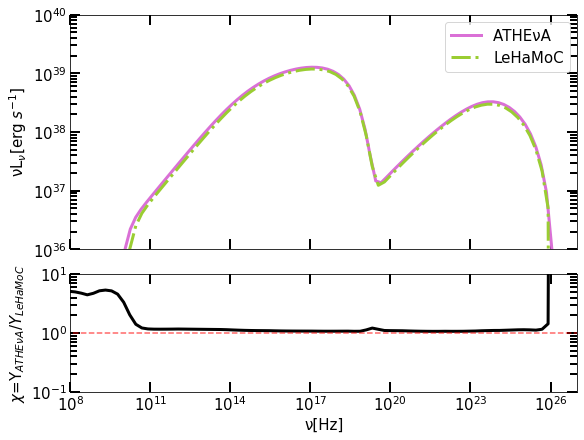

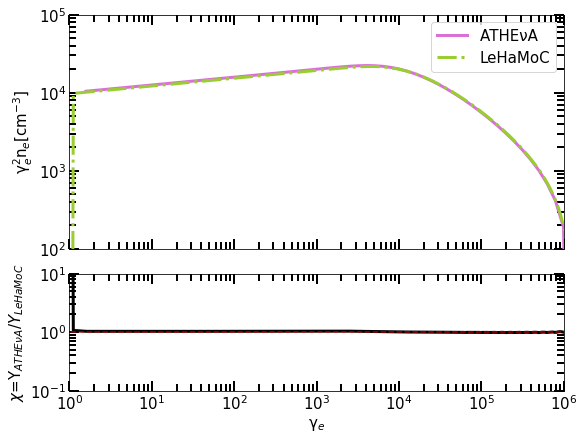

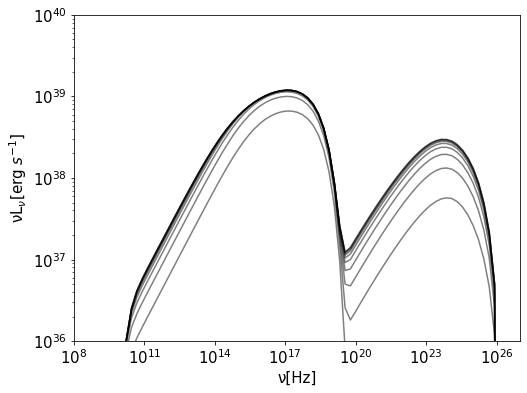

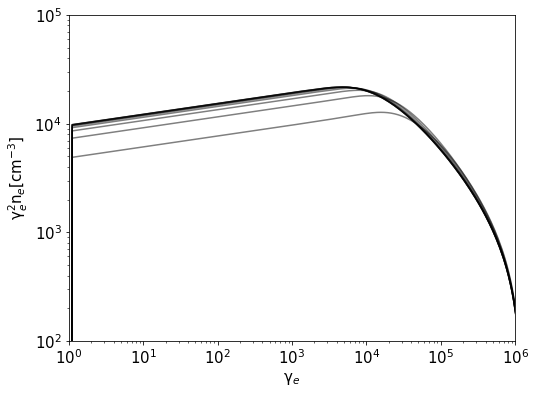

In [17]:
# Plots showing final snapshot (steady state)
# Select final snapshot from ATHEvA results
i = 11
g_el_t1 = np.array(10**(El_dis_s_cool_t1["logx"][i*t1_i_el+1 :(i+1)*t1_i_el-1]))
N_el_t1 = np.array(10.**(El_dis_s_cool_t1["logy"][i*t1_i_el+1:(i+1)*t1_i_el-1]))/(sigmaT*R0)

ν_t1 = np.array(10**(Ph_dis_s_cool_t1["logx"][i*t1_i_ph+1 :(i+1)*t1_i_ph-1]))*m_el*c**2./h
ν_L_ν_t1 = np.array(10**(Ph_dis_s_cool_t1["logy"][i*t1_i_ph+1 :(i+1)*t1_i_ph-1]))*4.*np.pi/3.*(R0)*m_el*c**3./sigmaT

g_el_pair_t1 = np.array(10**(Q_ee_dis_n_cool_t1["logx"][i*t1_i_ee+1 :(i+1)*t1_i_ee-1]))
N_el_pair_t1 = np.array(10**(-Q_ee_dis_n_cool_t1["logy"][i*t1_i_ee+1 :(i+1)*t1_i_ee-1]))*c/(sigmaT*R0**2.)

# Select final snapshot from LeMoC results
iplot = time_end
nu_tot = np.array(10**Ph_dis_lemoc_t1["logx"][(iplot-1)*grid_nu:iplot*grid_nu])
Spec_temp_tot = np.array(10**Ph_dis_lemoc_t1["logy"][(iplot-1)*grid_nu:iplot*grid_nu])
g_el  = np.array(10**El_dis_lemoc_t1["logx"][(iplot-1)*grid_g_el:iplot*grid_g_el])
N_el  = np.array(10**El_dis_lemoc_t1["logy"][(iplot-1)*grid_g_el:iplot*grid_g_el])

plotting_res_1(ν_t1,ν_L_ν_t1,nu_tot,Spec_temp_tot,'νL$_{ν}$[erg $s^{-1}$]',"ν[Hz]",10**8.,10**27.,10**(36.),10**40.,"AΤΗΕνΑ","LeHaMoC","test1_ph.png")
plotting_res_1(g_el_t1,N_el_t1,g_el,g_el**2.*N_el,'γ$_e^2$n$_e$[cm$^{-3}$]',"γ$_{e}$",10**0.,10**6.,10**(2.),10**(5.),"AΤΗΕνΑ","LeHaMoC","test1_el.png")


nu_tot = np.array(10**Ph_dis_lemoc_t1["logx"])
Spec_temp_tot = np.array(10**Ph_dis_lemoc_t1["logy"])/nu_tot**2
g_el  = np.array(10**El_dis_lemoc_t1["logx"])
N_el  = np.array(10**El_dis_lemoc_t1["logy"])

# Plots showing time evolution
plotting_evol(nu_tot,Spec_temp_tot,grid_nu, 'νL$_{ν}$[erg $s^{-1}$]',"ν[Hz]",10**8.,10**27.,10**(36.),10**40.,"test1_ph_evol.png")
plotting_evol(g_el, N_el, grid_g_el,'γ$_e^2$n$_e$[cm$^{-3}$]',"γ$_{e}$",10**0.,10**6.,10**(2.),10**(5.),"test1_el_evol.png")

# Test 3:  time-dependent adiabatic expansion leptonic model

Test 3 parameters:
time_init = 0.
time_end = 600.
step_alg = 2.
g_min_el = 0.
g_max_el = 4.1
g_PL_min = 3.
g_PL_max = 4.
grid_g_el = 400.
grid_nu = 100
p_el = 2.01
L_el = 48.0
Vexp = 0.1
R0 = 13.
B0 = 10.
m = 0.
delta = 1.
inj_flag = 0.
Ad_l_flag = 1.
Syn_l_flag = 0.
Syn_emis_flag = 0.
IC_l_flag = 0.
IC_emis_flag = 0.
SSA_l_flag = 0.
gg_flag = 0.
esc_flag = 0.
BB_flag = 0.
BB_temperature = 6.
GB_ext = 1.
PL_flag = 0.
dE_dV_ph = 0.
nu_min_ph = 0.
nu_max_ph = 0.
s_ph = 0.
User_ph = 0.

In [47]:
# Read Input Parameters file
fileName = "Parameters.txt" # add your full path here if needed
fileObj = open(fileName)
params = {}
for line in fileObj:
    line=line.strip()
    key_value = line.split("=")
    params[key_value[0].strip()] = float(key_value[1].strip())

time_init = int(float(params['time_init'])) # R0/c        
time_end = int(float(params['time_end'])) # R0/c
step_alg = float(params['step_alg']) #R0/c
grid_nu = int(float(params['grid_nu']))    
grid_g_el = int(float(params['grid_g_el']))
g_PL_min = 10**float(params['g_PL_min']) 
g_PL_max = 10**float(params['g_PL_max']) 
p_el = float(params['p_el'])
L_el = 10**float(params['L_el']) 
R0 = 10**float(params['R0']) #cm
B0 = float(params['B0']) # G
m = float(params['m'])
delta = float(params["delta"])
Vexp = float(params['Vexp'])*c #/c 

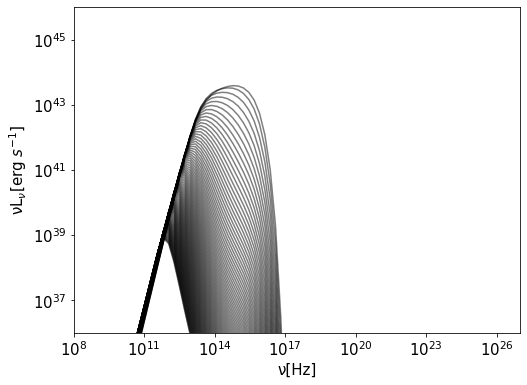

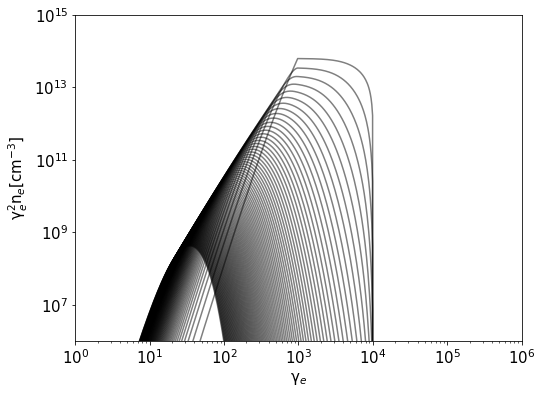

In [48]:
## Read Outpuf files
## LeMoC code results
El_dis_lemoc_t3 = pd.read_csv("Particles_Distribution_Test3.txt", names=["logx","logy"], sep=" ",  skiprows=0) 
Ph_dis_lemoc_t3 = pd.read_csv("Photons_Distribution_Test3.txt", names=["logx","logy"], sep=" ",  skiprows=0) 

nu_tot = np.array(10**Ph_dis_lemoc_t3["logx"])
Spec_temp_tot = np.array(10**Ph_dis_lemoc_t3["logy"])/nu_tot**2
g_el  = np.array(10**El_dis_lemoc_t3["logx"])
N_el  = np.array(10**El_dis_lemoc_t3["logy"])

# Plots showing time evolution
plotting_evol(nu_tot,Spec_temp_tot,grid_nu, 'νL$_{ν}$[erg $s^{-1}$]',"ν[Hz]",10**8.,10**27.,10**(36.),10**46.,"test1_ph_evol.png")
plotting_evol(g_el, N_el, grid_g_el,'γ$_e^2$n$_e$[cm$^{-3}$]',"γ$_{e}$",10**0.,10**6.,10**(6.),10**(15.),"test1_el_evol.png")